## 빅데이터 컴퓨팅 - 14주차

### 개념 잡는 데이터 분석 9장 - [회귀분석] 날씨 데이터 분석하기 예제

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

seoul = pd.read_excel(r".\BigData_Sources\(2010-2020) weather.xlsx")
seoul.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,2010-01-01,108,-7.6,-12.7,-3.6
1,2010-01-02,108,-3.6,-7.4,0.2
2,2010-01-03,108,-6.8,-10.5,-3.2
3,2010-01-04,108,-5.9,-8.0,-3.4
4,2010-01-05,108,-9.9,-12.3,-7.0


In [6]:
seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   날짜       4018 non-null   datetime64[ns]
 1   지점       4018 non-null   int64         
 2   평균기온(℃)  4018 non-null   float64       
 3   최저기온(℃)  4018 non-null   float64       
 4   최고기온(℃)  4017 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 157.1 KB


In [7]:
seoul.describe()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
count,4018,4018.0,4018.000000,4018.000000,4017.000000
mean,2015-07-02 12:00:00,108.0,12.965207,8.991015,17.699627
min,2010-01-01 00:00:00,108.0,-14.800000,-18.000000,-10.700000
25%,2012-10-01 06:00:00,108.0,3.700000,-0.300000,8.200000
50%,2015-07-02 12:00:00,108.0,14.250000,9.800000,19.600000
75%,2018-04-01 18:00:00,108.0,22.800000,18.900000,27.400000
max,2020-12-31 00:00:00,108.0,33.700000,30.300000,39.600000
std,NaN,0.0,10.803691,10.932678,10.976719


In [8]:
seoul.drop('지점', axis=1, inplace=True)
seoul.head()

,날짜,평균기온(℃),최저기온(℃),최고기온(℃)
0,2010-01-01,-7.6,-12.7,-3.6
1,2010-01-02,-3.6,-7.4,0.2
2,2010-01-03,-6.8,-10.5,-3.2
3,2010-01-04,-5.9,-8.0,-3.4
4,2010-01-05,-9.9,-12.3,-7.0


In [9]:
seoul.columns=['날짜', '평균기온', '최저기온', '최고기온']
seoul.head()

,날짜,평균기온,최저기온,최고기온
0,2010-01-01,-7.6,-12.7,-3.6
1,2010-01-02,-3.6,-7.4,0.2
2,2010-01-03,-6.8,-10.5,-3.2
3,2010-01-04,-5.9,-8.0,-3.4
4,2010-01-05,-9.9,-12.3,-7.0


In [10]:
seoul.isnull().sum()

날짜      0
평균기온    0
최저기온    0
최고기온    1
dtype: int64

In [11]:
seoul.dropna(subset=['최고기온'], axis=0, inplace=True)
seoul.isnull().sum()

날짜      0
평균기온    0
최저기온    0
최고기온    0
dtype: int64

In [12]:
seoul['년도'] = seoul['날짜'].dt.year
seoul.head()

,날짜,평균기온,최저기온,최고기온,년도
0,2010-01-01,-7.6,-12.7,-3.6,2010
1,2010-01-02,-3.6,-7.4,0.2,2010
2,2010-01-03,-6.8,-10.5,-3.2,2010
3,2010-01-04,-5.9,-8.0,-3.4,2010
4,2010-01-05,-9.9,-12.3,-7.0,2010


In [13]:
conditions = (seoul['날짜'].dt.month==8) & (seoul['날짜'].dt.day==15)
conditions
seoul0815 = seoul[conditions]
seoul0815

,날짜,평균기온,최저기온,최고기온,년도
226,2010-08-15,26.6,24.6,30.2,2010
591,2011-08-15,24.5,22.9,26.9,2011
957,2012-08-15,23.7,22.4,27.1,2012
1322,2013-08-15,28.7,25.8,32.4,2013
1687,2014-08-15,24.9,20.9,29.6,2014
2052,2015-08-15,27.1,23.1,30.8,2015
2418,2016-08-15,29.1,25.8,34.0,2016
2783,2017-08-15,21.9,20.8,24.0,2017
3148,2018-08-15,31.7,28.3,38.0,2018
3513,2019-08-15,25.9,23.9,28.6,2019


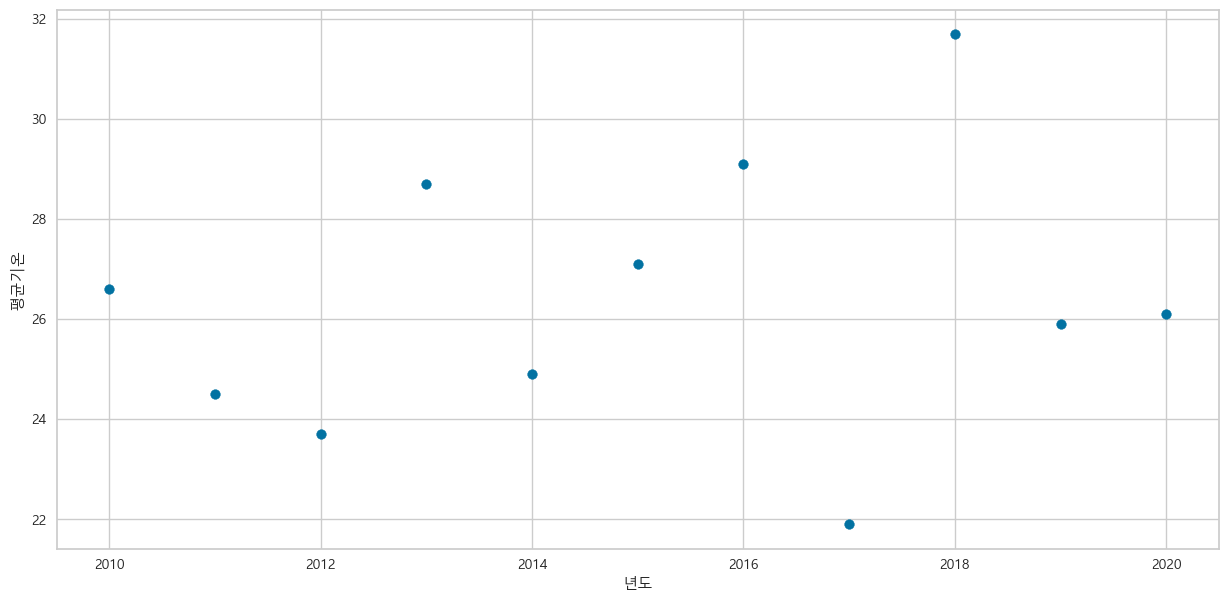

In [14]:
plt.rc('font', family='Malgun Gothic')
fig = plt.figure(figsize=(15, 7))
X = seoul0815[['년도']]
Y = seoul0815['평균기온']
plt.xlabel('년도')
plt.ylabel('평균기온')
plt.scatter(X, Y)
plt.show()

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
x = seoul0815[['년도']]
y = seoul0815['평균기온']
model.fit(x, y)
result = model.predict([[2022]])
print(result)

[27.50818182]


C:\Users\NSU\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


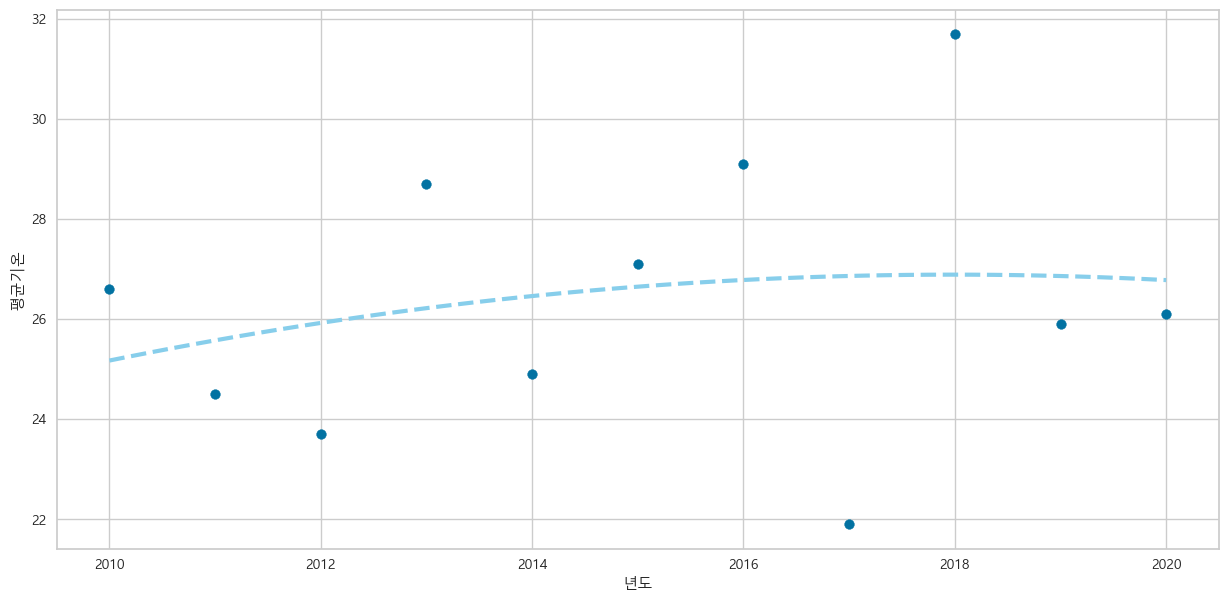

In [16]:
x = seoul0815['년도']
y = seoul0815['평균기온']
fp1 = np.polyfit(x, y, 2)
f1 = np.poly1d(fp1)
fx = np.linspace(2010, 2020)
plt.figure(figsize=(15, 7))
plt.scatter(x, y)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='skyblue')
plt.xlabel('년도')
plt.ylabel('평균기온')
plt.show()

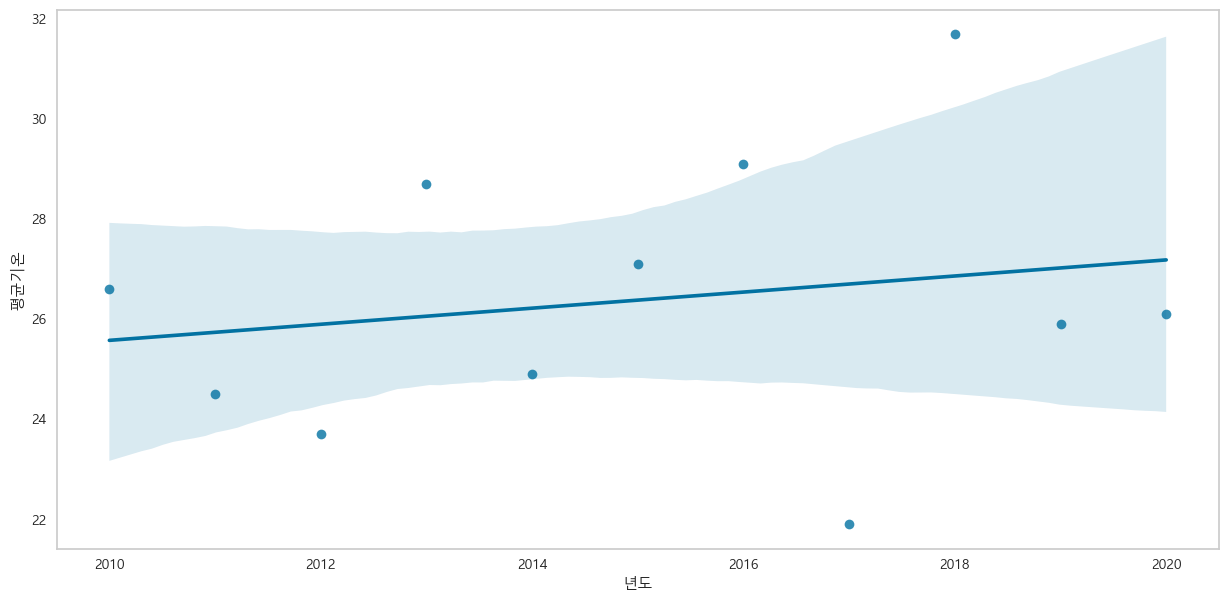

In [17]:
fig = plt.figure(figsize=(15, 7))
sns.regplot(x='년도', y='평균기온', data=seoul0815)
plt.grid()
plt.show()

<Figure size 1500x700 with 0 Axes>

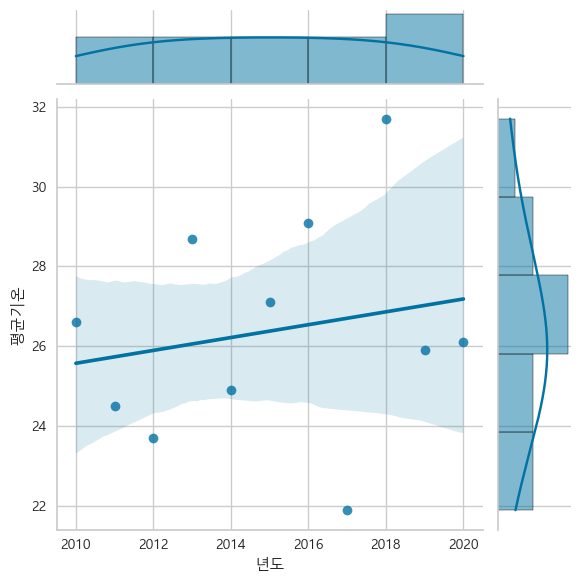

In [18]:
fig = plt.figure(figsize=(15, 7))
sns.jointplot(x='년도', y='평균기온', data=seoul0815, kind='reg')
plt.show()

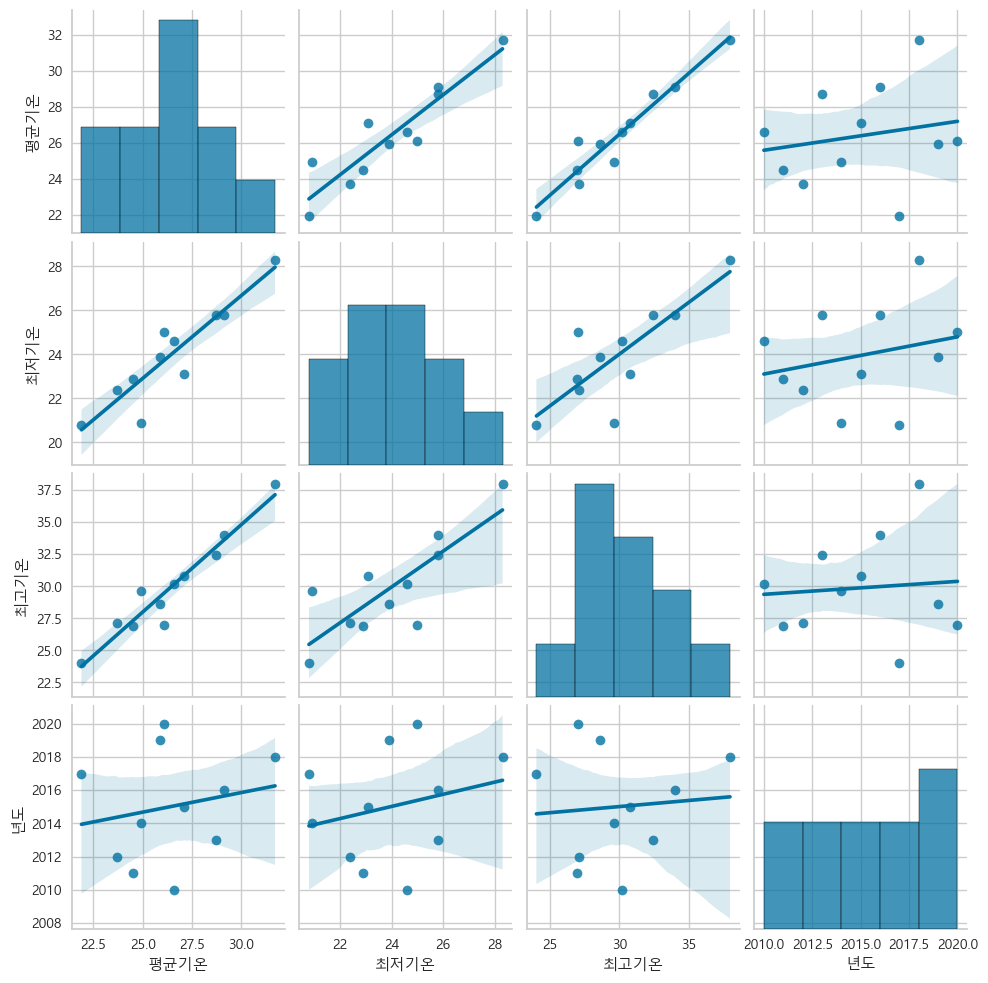

In [19]:
sns.pairplot(seoul0815, kind='reg')
plt.show()

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

X = seoul0815[['년도', '최저기온', '최고기온']]
Y = seoul0815['평균기온']

model.fit(X, Y)
result = model.predict([[2022, 24, 33]])
print(result)

[28.08381871]


C:\Users\NSU\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


C:\Users\NSU\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\NSU\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


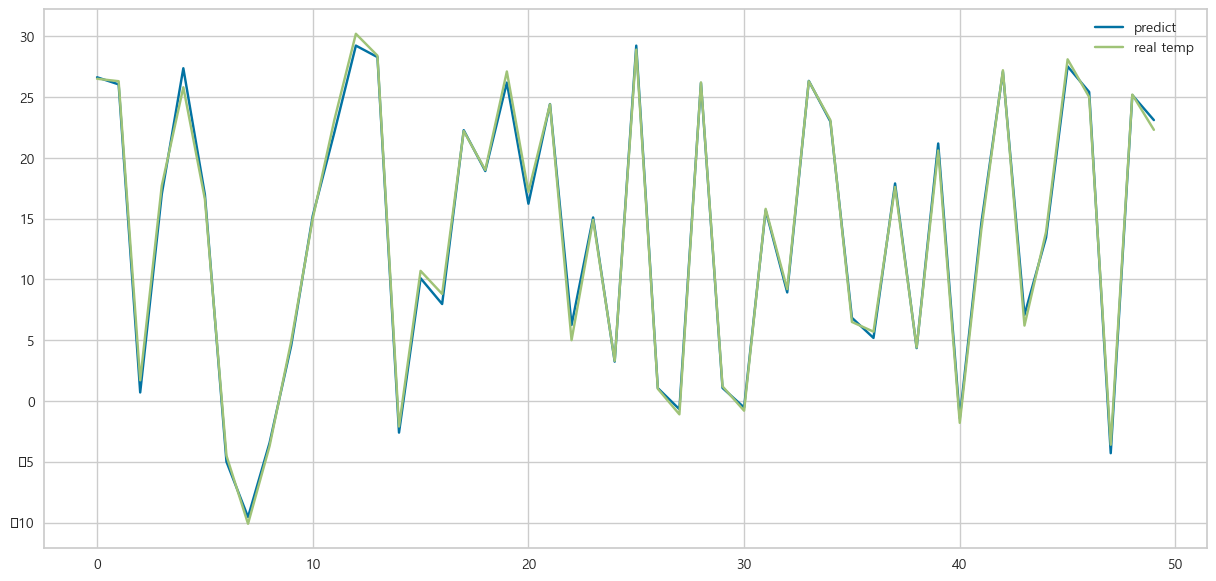

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
seoul.head()

plt.figure(figsize=(15, 7))
X = seoul[['년도', '최저기온', '최고기온']]
Y = seoul['평균기온']

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3)
model = LinearRegression()
model.fit(x_train, y_train)

plt.plot(model.predict(x_test[:50]), label='predict')
plt.plot(y_test[:50].values.reshape(-1, 1), label='real temp')
plt.legend()

C:\Users\NSU\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


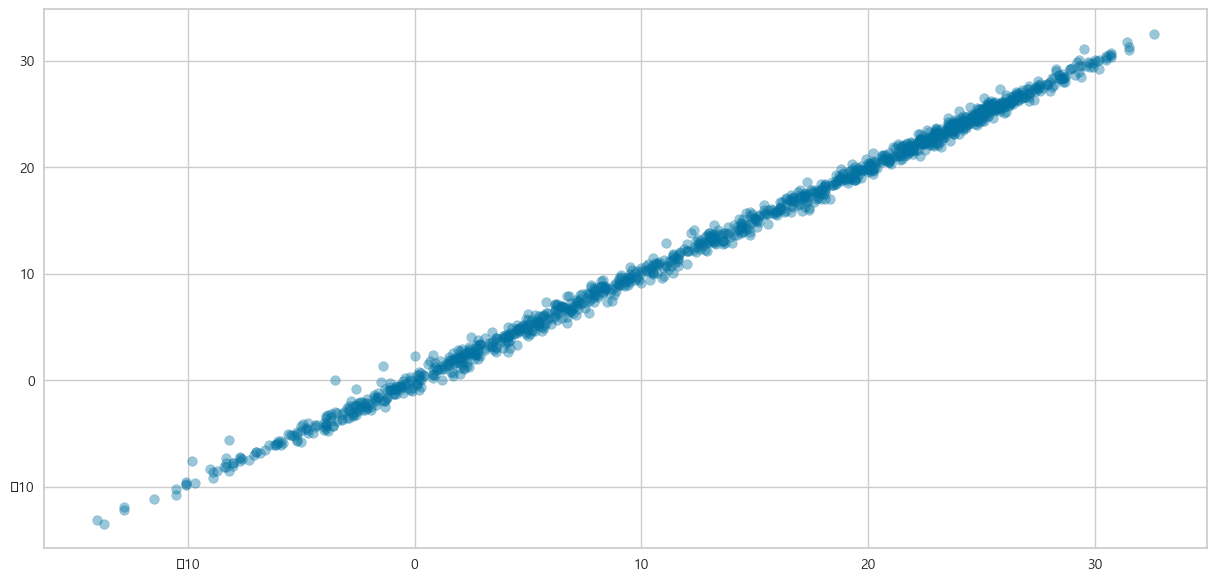

In [22]:
plt.figure(figsize=(15, 7))
y_predict = model.predict(x_test)

plt.scatter(y_test, y_predict, alpha=0.4)
plt.show()

In [23]:
print(model.score(x_train, y_train))

0.9977814198276993


### 개념 잡는 데이터 분석 10장 - 클러스터링 예제

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

df = pd.read_csv(r".\BigData_Sources\Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [88]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


C:\Users\NSU\AppData\Local\Temp\ipykernel_15008\214813629.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], bins=20)


Text(0.5, 1.0, 'Distplot of Age')

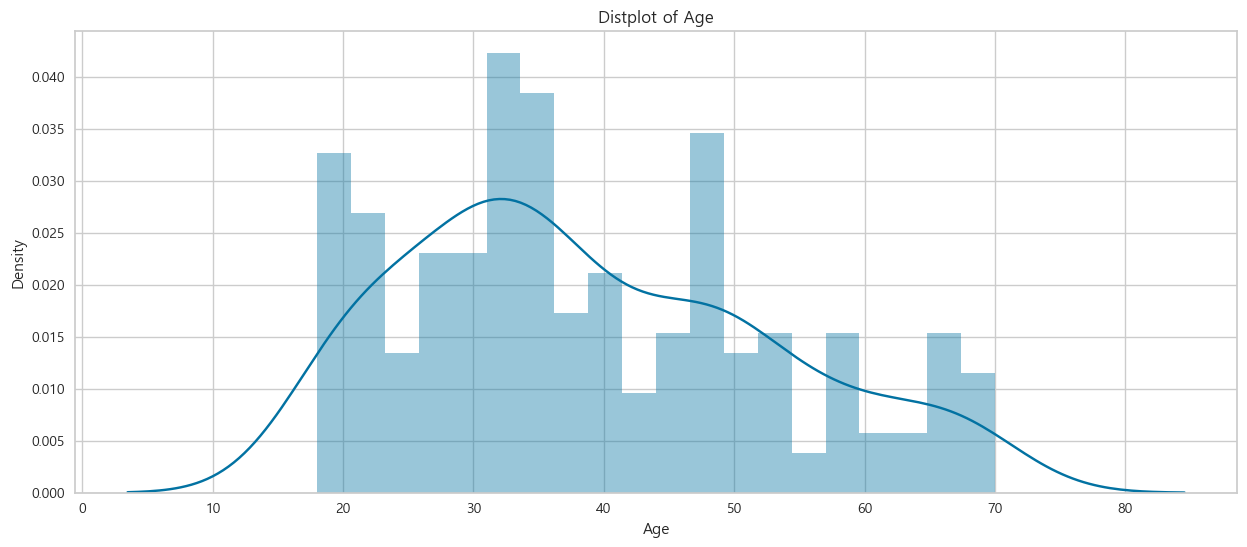

In [90]:
plt.figure(1, figsize=(15, 6))
sns.distplot(df['Age'], bins=20)
plt.title('Distplot of Age')

C:\Users\NSU\AppData\Local\Temp\ipykernel_15008\171441528.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Annual Income (k$)'], bins=20)


Text(0.5, 1.0, 'Distplot of Age')

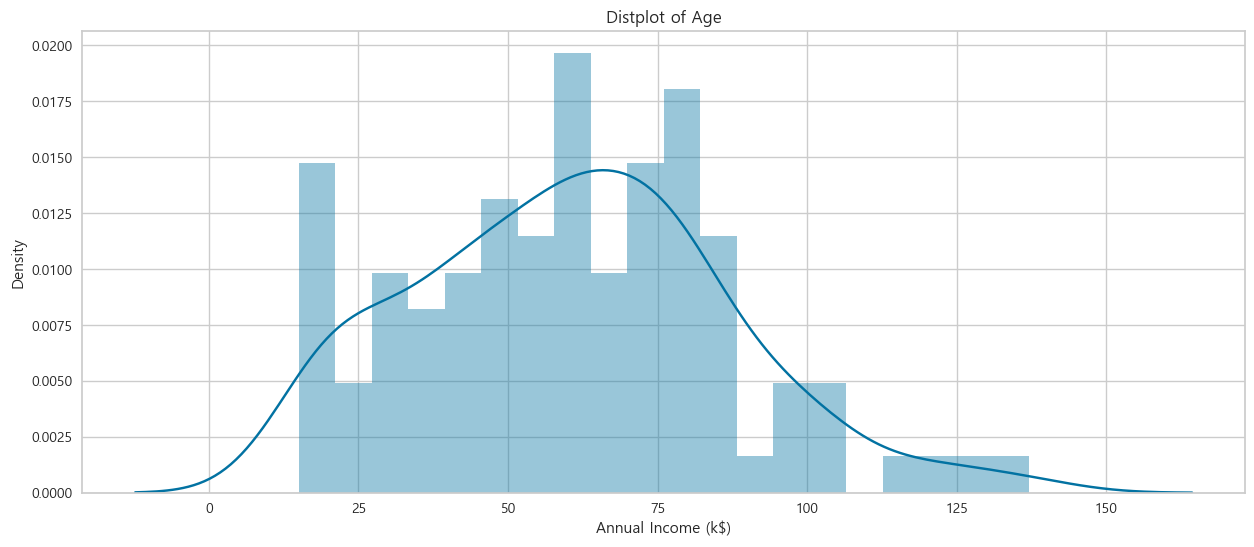

In [92]:
plt.figure(1, figsize=(15, 6))
sns.distplot(df['Annual Income (k$)'], bins=20)
plt.title('Distplot of Age')

C:\Users\NSU\AppData\Local\Temp\ipykernel_15008\2855805058.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Spending Score (1-100)'], bins=20)


Text(0.5, 1.0, 'Distplot of Spending Score')

C:\Users\NSU\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\NSU\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


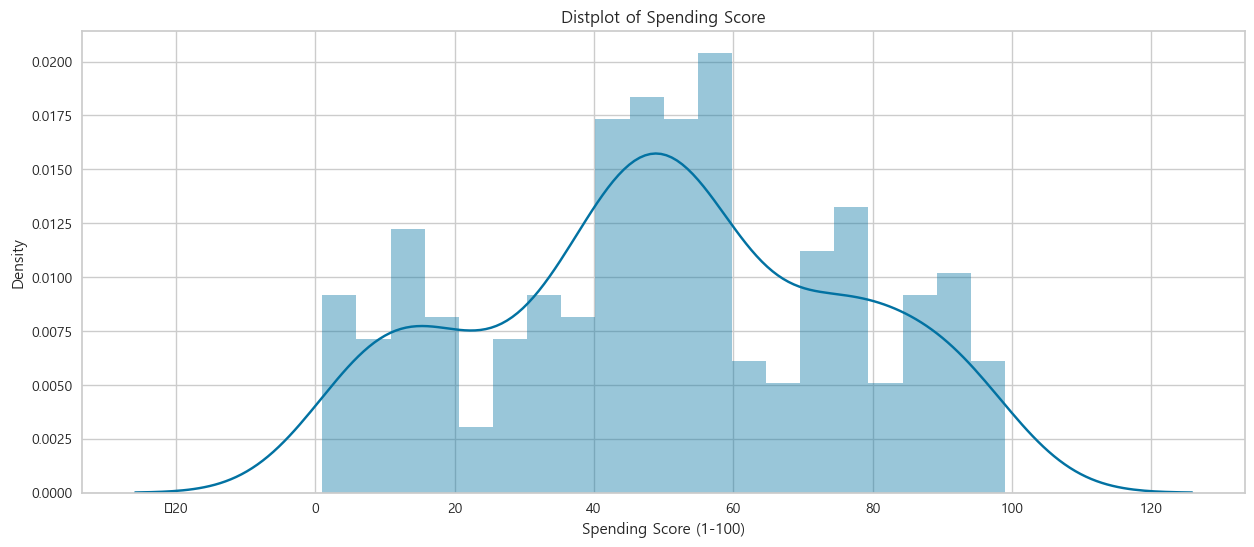

In [94]:
plt.figure(1, figsize=(15, 6))
sns.distplot(df['Spending Score (1-100)'], bins=20)
plt.title('Distplot of Spending Score')

Gender
Female    112
Male       88
Name: count, dtype: int64


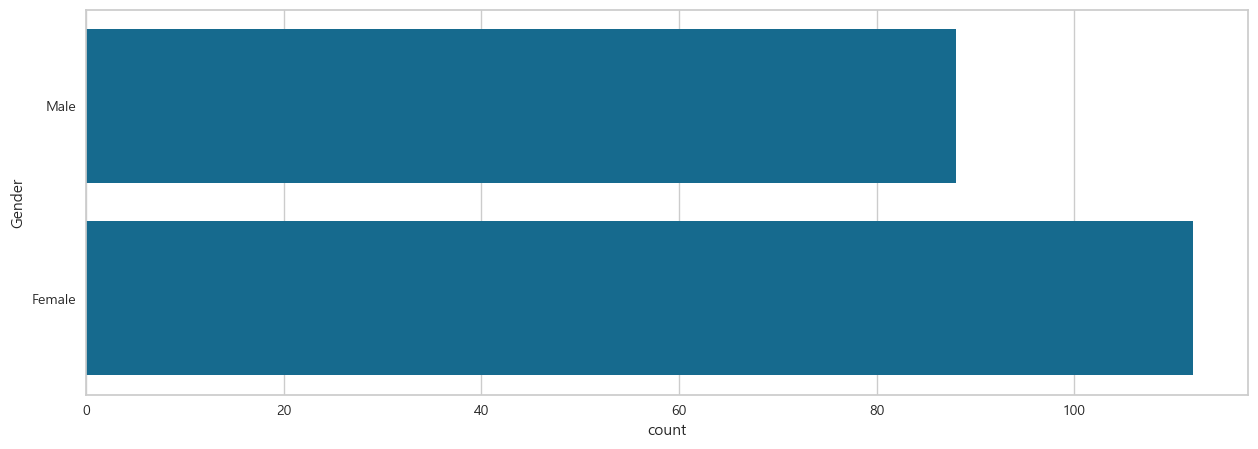

In [96]:
plt.figure(1, figsize=(15, 5))
sns.countplot(y='Gender', data=df)
print(df['Gender'].value_counts())

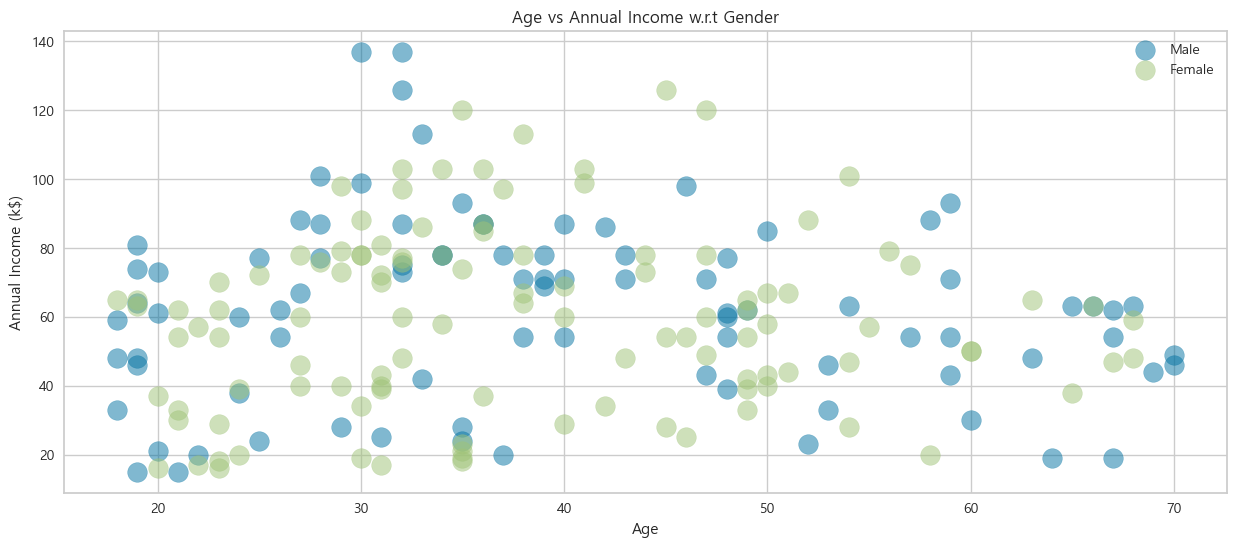

In [98]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()

C:\Users\NSU\AppData\Local\Temp\ipykernel_15008\1124532198.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = 'Age' , y = 'Gender' , data = df , palette = 'vlag')


Text(27.597222222222214, 0.5, 'Gender')

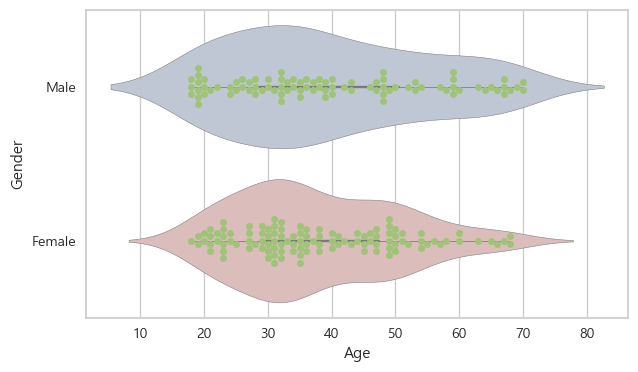

In [100]:
plt.figure(1 , figsize = (7 , 4))

sns.violinplot(x = 'Age' , y = 'Gender' , data = df , palette = 'vlag')
sns.swarmplot(x = 'Age' , y = 'Gender' , data = df)
plt.ylabel('Gender')

#### K-means를 이용한 군집화

C:\Users\NSU\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\NSU\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\NSU\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\NSU\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with M

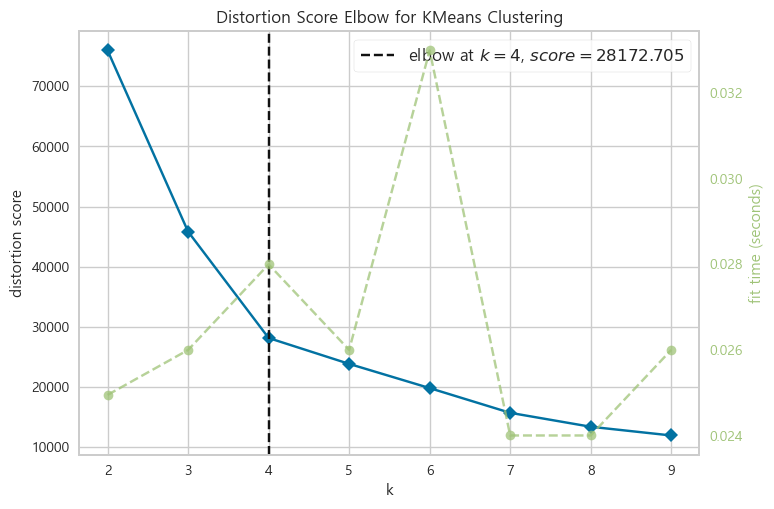

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [102]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
data= df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(data)
visualizer.show()

C:\Users\NSU\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\NSU\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\NSU\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\NSU\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with M

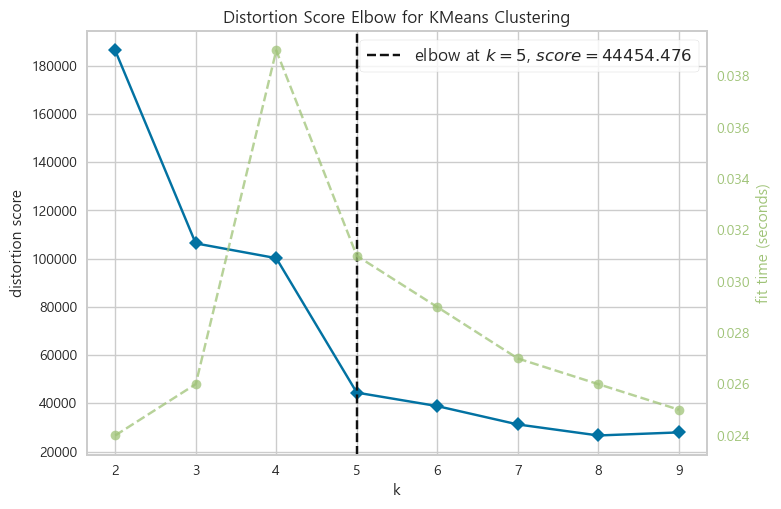

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [48]:
data= df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(data)
visualizer.show()

C:\Users\NSU\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\NSU\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\NSU\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\NSU\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with M

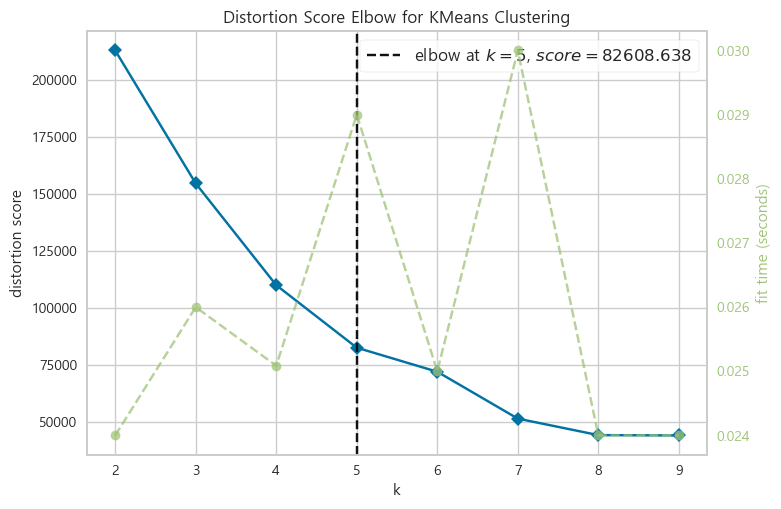

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [104]:
data= df[['Age', 'Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(data)
visualizer.show()

In [106]:
data = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
algorithm = KMeans(n_clusters = 4) 
algorithm.fit(data)
labels1 = algorithm.labels_
df['label1'] =  labels1 
df.head(20)

C:\Users\NSU\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label1
0,1,Male,19,15,39,2
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,2
5,6,Female,22,17,76,0
6,7,Female,35,18,6,3
7,8,Female,23,18,94,0
8,9,Male,64,19,3,1
9,10,Female,30,19,72,0


<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

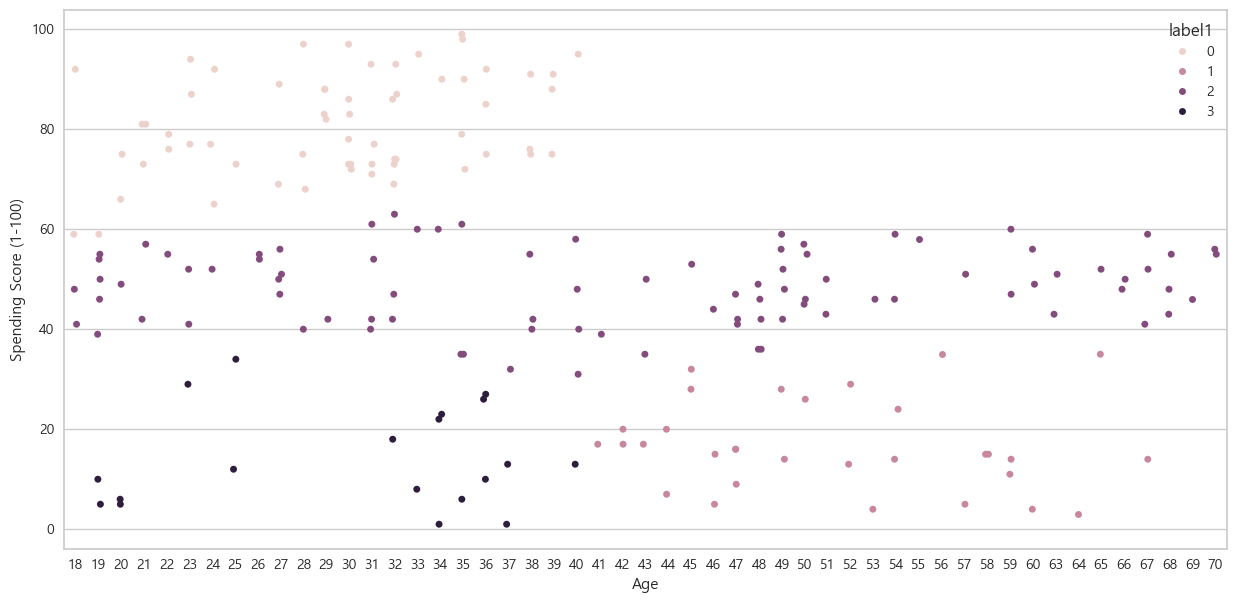

In [108]:
plt.figure(figsize = (15 , 7) )
sns.stripplot(x='Age', y='Spending Score (1-100)', data=df, hue='label1', jitter=True)

In [120]:
data = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
algorithm = KMeans(n_clusters = 5) 
algorithm.fit(data)
labels2 = algorithm.labels_
df['label2'] =  labels2
df.head(20)

C:\Users\NSU\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label1,label3,label3_pred,label2
0,1,Male,19,15,39,2,4,4,3
1,2,Male,21,15,81,0,2,2,2
2,3,Female,20,16,6,3,4,4,3
3,4,Female,23,16,77,0,2,2,2
4,5,Female,31,17,40,2,4,4,3
5,6,Female,22,17,76,0,2,2,2
6,7,Female,35,18,6,3,4,4,3
7,8,Female,23,18,94,0,2,2,2
8,9,Male,64,19,3,1,4,4,3
9,10,Female,30,19,72,0,2,2,2


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

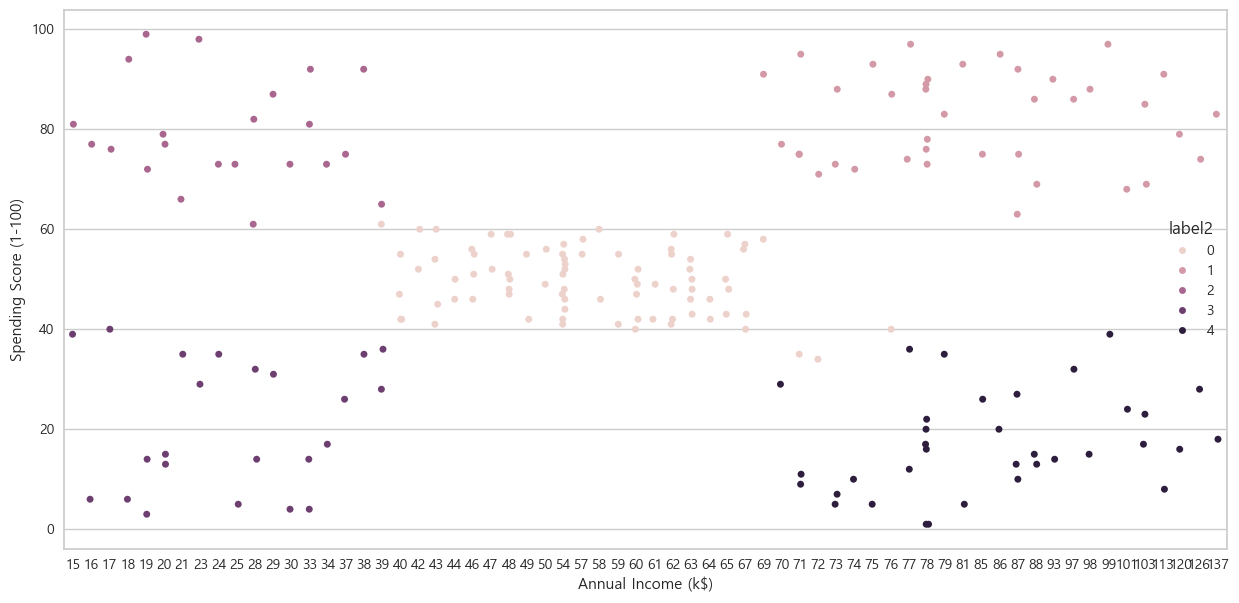

In [126]:
plt.figure(figsize = (15 , 7) )
sns.stripplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='label2', jitter=True)

In [128]:
data = df[['Age', 'Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
algorithm = KMeans(n_clusters = 5) 
algorithm.fit(data)
labels3 = algorithm.labels_
df['label3'] =  labels3
df.head(10)

C:\Users\NSU\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label1,label3,label3_pred,label2
0,1,Male,19,15,39,2,3,4,3
1,2,Male,21,15,81,0,4,2,2
2,3,Female,20,16,6,3,3,4,3
3,4,Female,23,16,77,0,4,2,2
4,5,Female,31,17,40,2,3,4,3
5,6,Female,22,17,76,0,4,2,2
6,7,Female,35,18,6,3,3,4,3
7,8,Female,23,18,94,0,4,2,2
8,9,Male,64,19,3,1,3,4,3
9,10,Female,30,19,72,0,4,2,2


<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

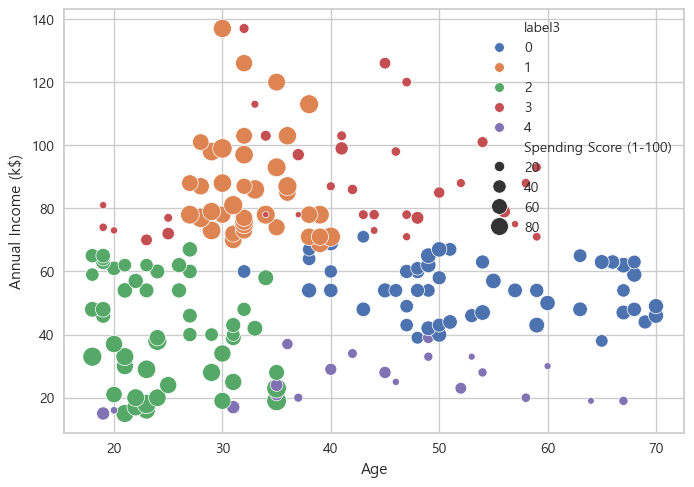

In [116]:
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='label3', size='Spending Score (1-100)', data=df, palette='deep', sizes=(20,200))

In [132]:
algorithm.predict([[19,15,39]])
data = df[['Age', 'Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
df['label3_pred'] = algorithm.predict(data)
df[['label3', 'label3_pred']]

,label3,label3_pred
0,3,3
1,4,4
2,3,3
3,4,4
4,3,3
...,...,...
195,2,2
196,0,0
197,2,2
198,0,0


#### Hierarchical clustering을 이용한 군집화

In [139]:
import pandas as pd
df=pd.read_csv(r".\BigData_Sources\Mall_Customers.csv")
data= df[['Age', 'Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
data.shape

(200, 3)

(199, 4)


Text(0, 0.5, 'Euclidean distances')

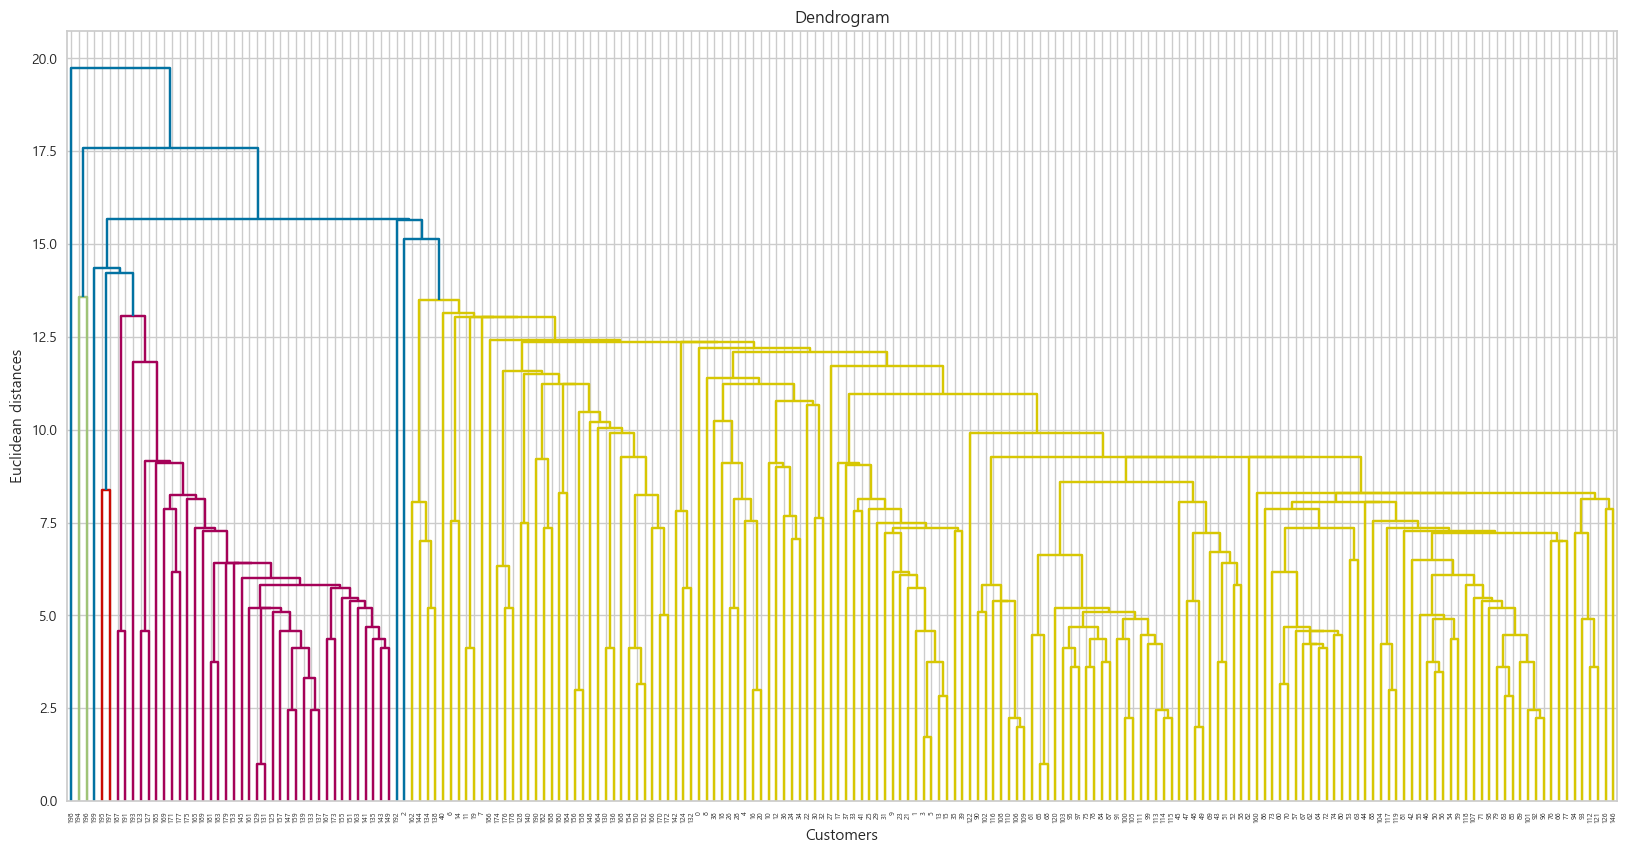

In [193]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))
cluster1 = linkage(data, method='single')
print(cluster1.shape)
dendrogram = dendrogram(cluster1)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')

Text(0, 0.5, 'Euclidean distances')

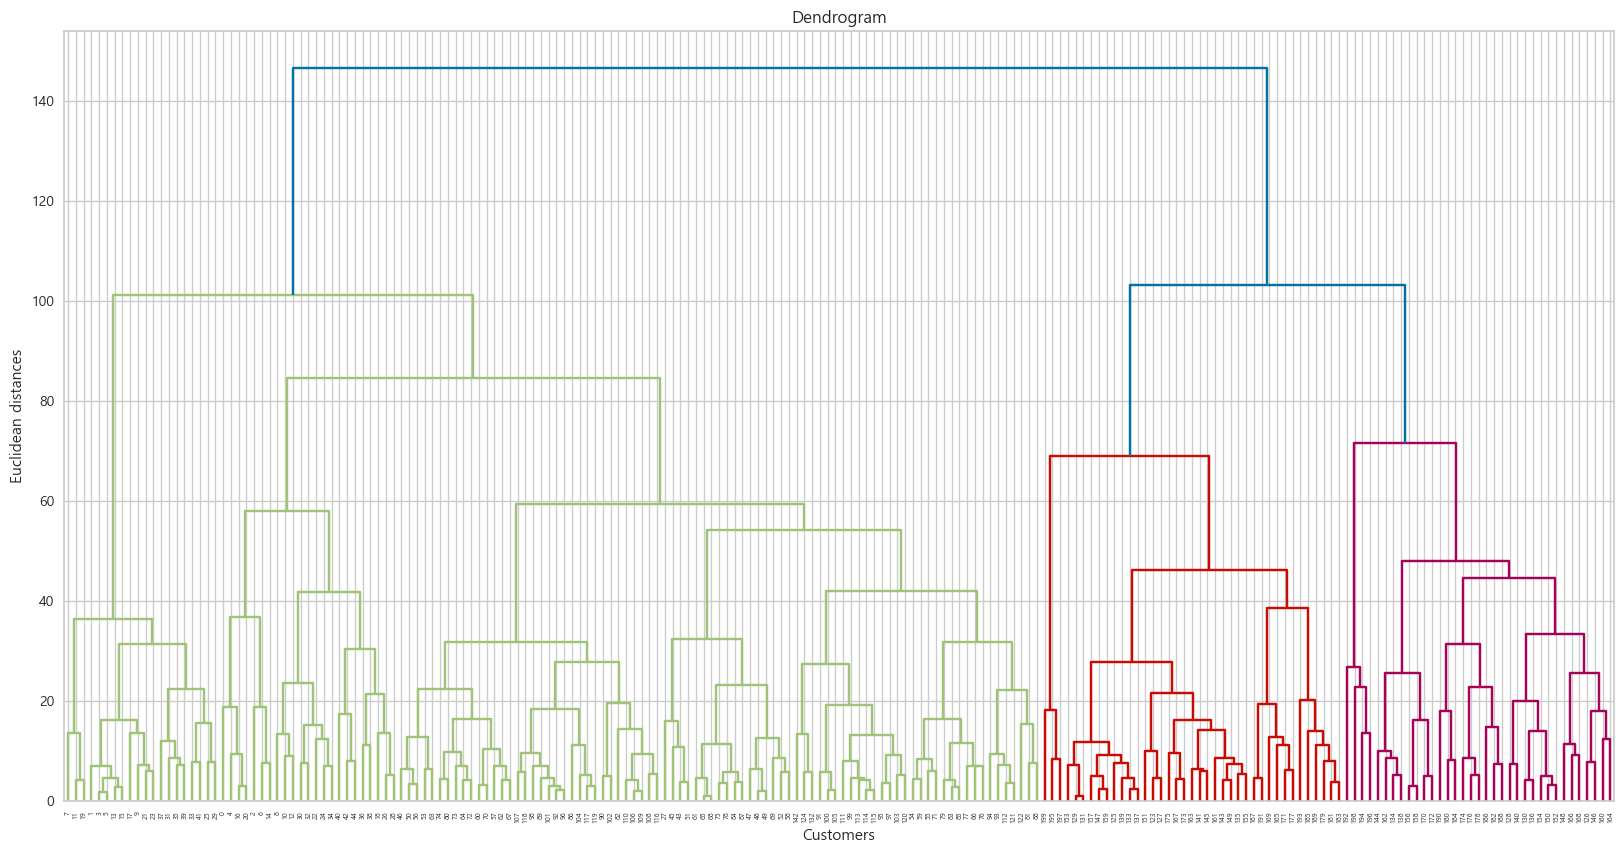

In [191]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))
cluster2 = linkage(data, method='complete')

dendrogram = dendrogram(cluster2)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')

Text(0, 0.5, 'Euclidean distances')

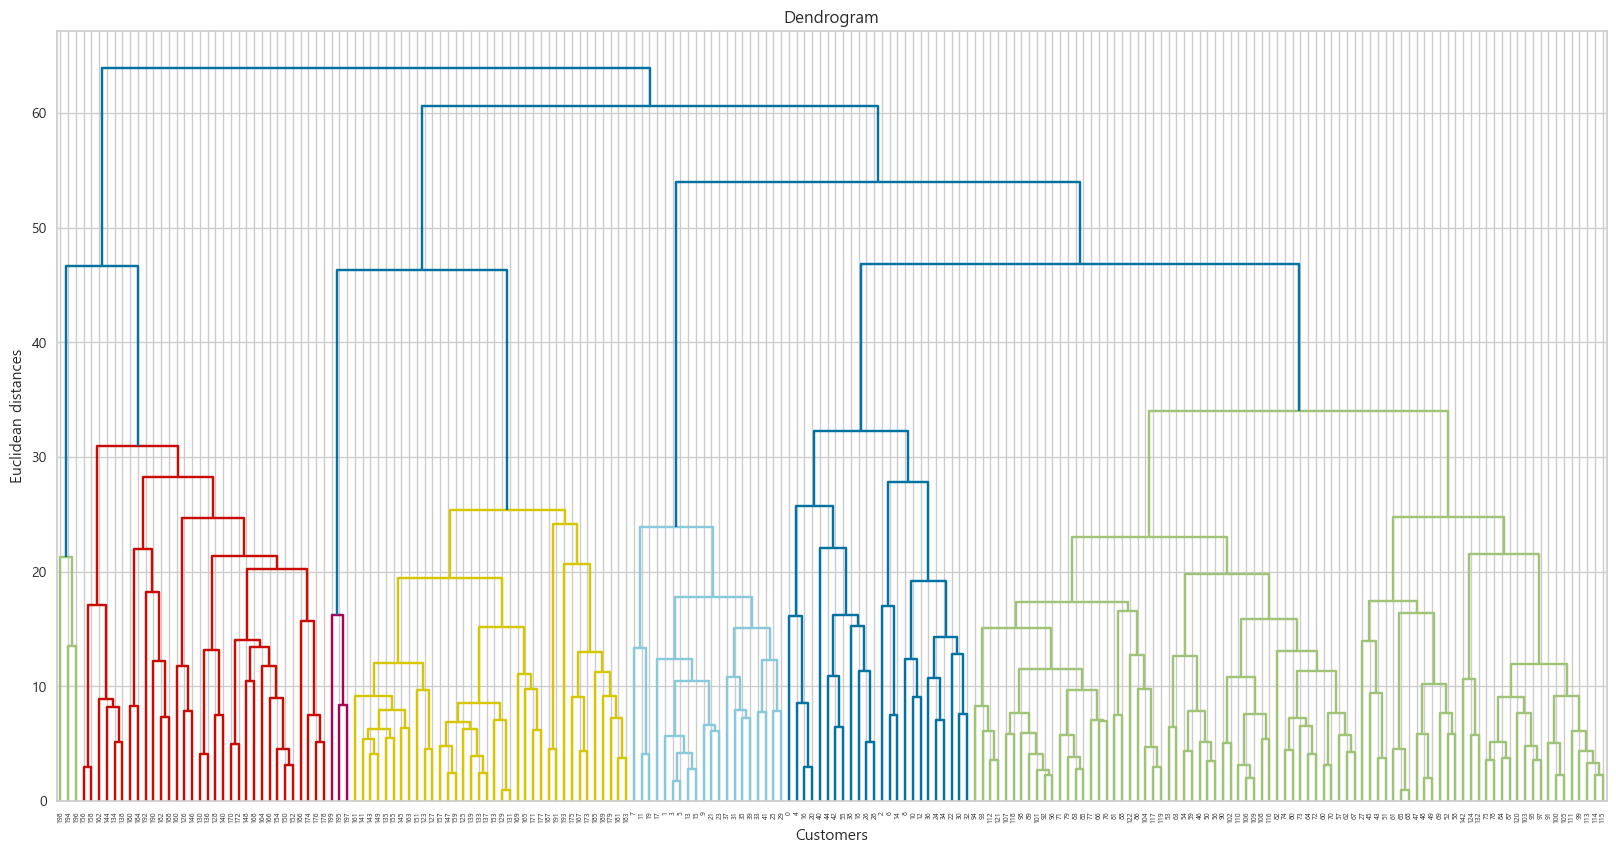

In [160]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))
cluster3 = linkage(data, method='average')

dendrogram = dendrogram(cluster3)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')

Text(0, 0.5, 'Euclidean distances')

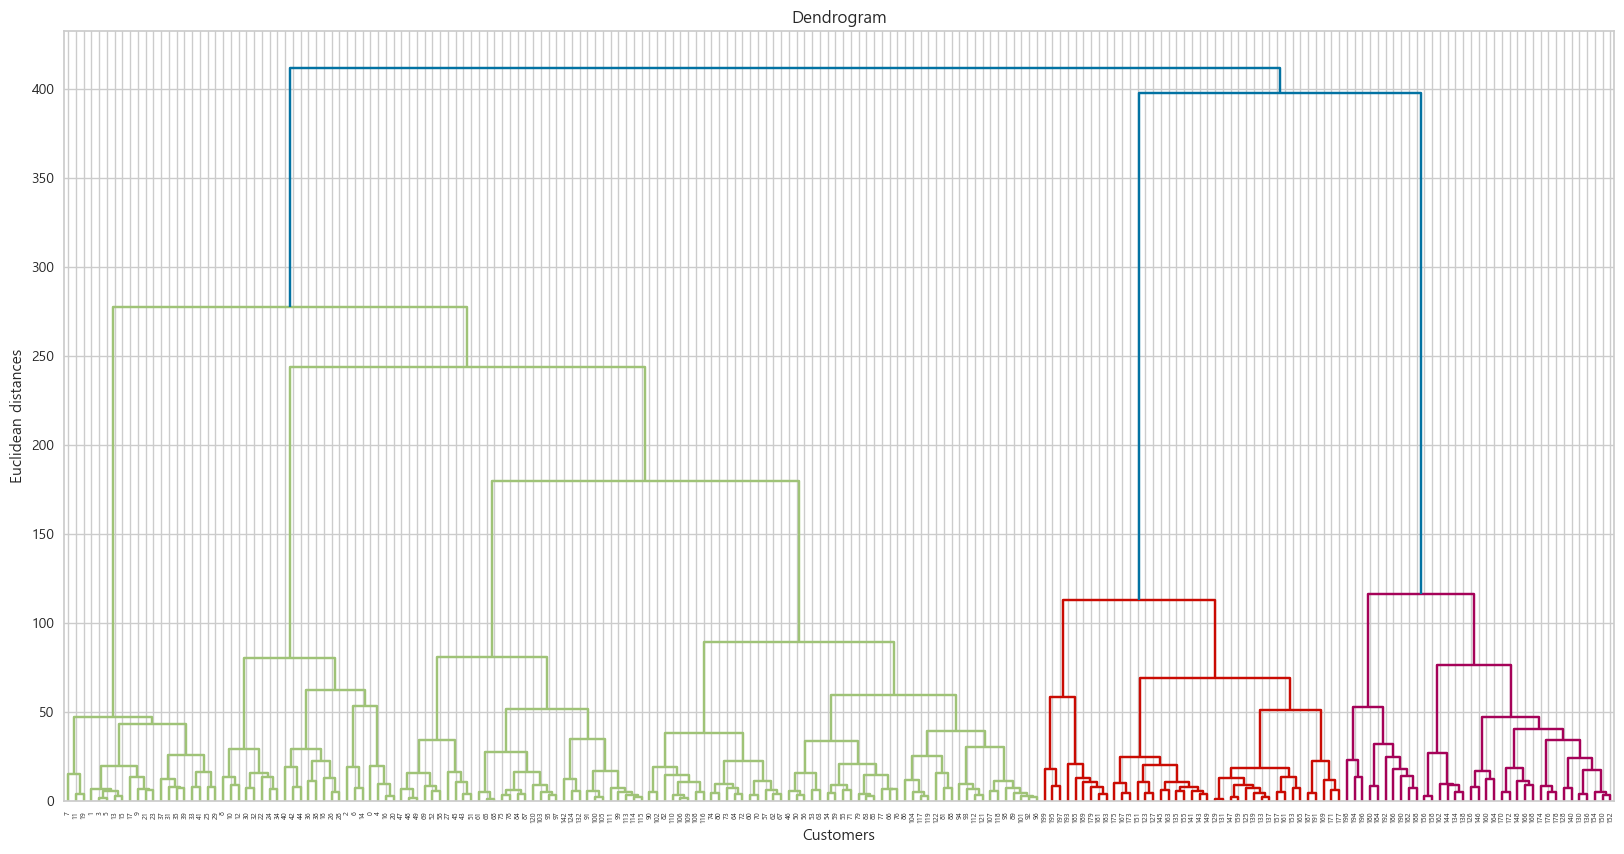

In [165]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))
cluster4 = linkage(data, method='ward')

dendrogram = dendrogram(cluster4)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')

In [185]:
from sklearn.cluster import AgglomerativeClustering

cluster_model = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
cluster_label = cluster_model.fit_predict(data)
df['label4'] = cluster_label
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label4
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

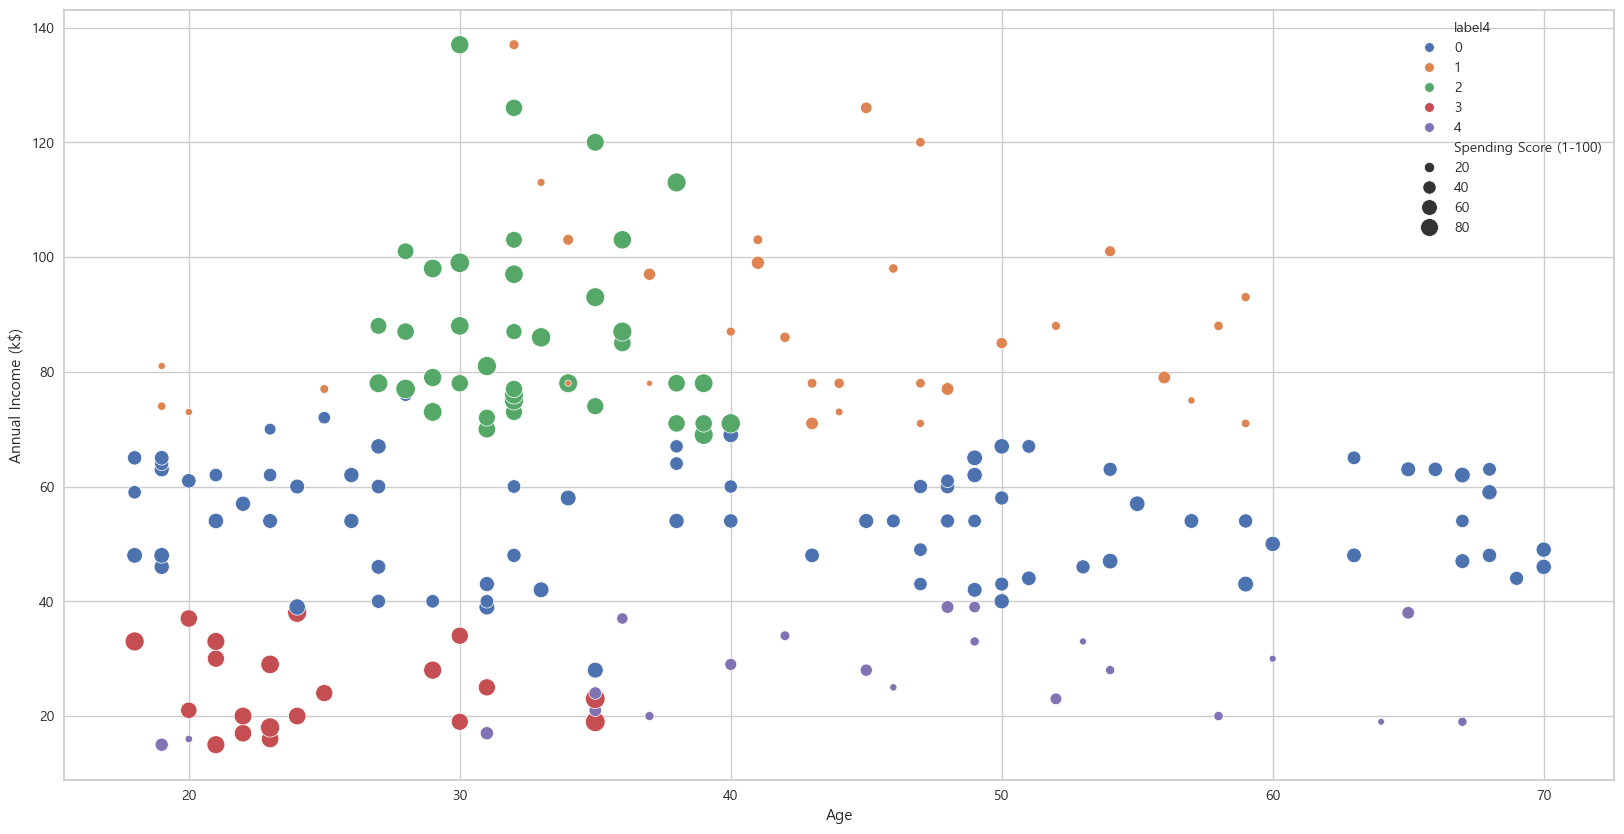

In [189]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='label4', size='Spending Score (1-100)', data=df, palette='deep', sizes=(20,200))